리뷰데이터 가져오기 / 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


게스트 선호도 별 숙소 리뷰데이터 나누기

In [ ]:
# 기본 패키지 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/Weekly_project_TeamID/예진/NanumGothic.ttf'

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

# 데이터 불러오기

path = '/content/drive/MyDrive/Weekly_project_TeamID/Data/Airbnb_London/combined_reviews.csv'


df_review = pd.read_csv(path, encoding='utf-8')

df_review.dropna(subset=['리뷰'],inplace=True)

#date >> 데이터타입 변경 datatime

df_review['리뷰날짜'] = pd.to_datetime(df_review['리뷰날짜'])



In [ ]:
path = '/content/drive/MyDrive/Weekly_project_TeamID/Data/Airbnb_London/전처리된_listing.csv'


london_lists = pd.read_csv(path, encoding='utf-8')

In [ ]:
london_lists.shape

(36407, 27)

In [ ]:
df_review.shape

(671964, 3)

리뷰작성년도 2022. 2023, 2024 년도 사용

In [ ]:
review_recent = df_review[df_review['리뷰날짜'].dt.year >= 2022]


10만개씩 랜덤추출

In [ ]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
review_10 = review_recent.sample(n=100000, random_state=42)


# 결과를 확인합니다.
print(review_10)



           숙소_id       리뷰날짜                                                 리뷰
400819  21980231 2022-09-04  The home is so adorable. Fantastic accommodati...
651246  27598715 2023-03-31  Very pleasant apartment, ideally located? (3 m...
430892  24507428 2023-06-09  We loved  our stay at Jack’s place. So close t...
322584  17517605 2022-06-22  Nice flat situated in a good location. The pho...
229212  12004105 2022-07-06  The garden cottage was clean and comfortable. ...
...          ...        ...                                                ...
644379  23888981 2023-04-09  We highly recommend it! Great place and worth ...
75951    2008413 2024-02-14                Great place for our one night stay!
367887  20076727 2023-03-06  Carolina was so much help for my brother. And ...
273625  14325492 2022-08-15    Everything was great. Adelaide is super kind :)
383144  21067600 2022-05-27  Was done on London for business and pleasure. ...

[100000 rows x 3 columns]


In [ ]:
review_10['숙소_id'].drop_duplicates().values.tolist()
lists_10 = london_lists[london_lists['숙소_id'].isin(review_10['숙소_id'].drop_duplicates().values.tolist())]

In [ ]:
lists_10.shape

(8062, 27)

게스트선호숙소별로 나눈 데이터에서 랜덤으로 5만개씩 추출한 데이터의 숙소 EDA

In [ ]:
!pip install plotly

In [ ]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

In [ ]:
lists_10['숙소_가격'].agg(['mean', 'max', 'min'])

mean    126.583478
max     509.000000
min      14.000000
Name: 숙소_가격, dtype: float64

In [ ]:
import pandas as pd
import plotly.express as px


# mean, max, min 계산
agg_values = lists_10['숙소_가격'].agg(['mean', 'max', 'min'])

# 데이터프레임으로 변환
agg_df = agg_values.reset_index()
agg_df.columns = ['Statistic', 'Value']

# plotly 막대그래프 생성
fig = px.bar(agg_df, x='Statistic', y='Value', title='숙소 가격 통계', text='Value')
fig.update_traces(texttemplate='%{text:.2f}$', textposition='outside')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


# mean, max, min 계산
agg_values = lists_10['리뷰점수'].agg(['mean', 'max', 'min'])

# 데이터프레임으로 변환
agg_df = agg_values.reset_index()
agg_df.columns = ['Statistic', 'Value']

# plotly 막대그래프 생성
fig = px.bar(agg_df, x='Statistic', y='Value', title='리뷰점수 통계', text='Value',color='Statistic', color_discrete_sequence=['blue', 'green', 'red'])
fig.update_traces(texttemplate='%{text:.2f}점', textposition='outside')

fig.show()



In [ ]:
import pandas as pd
import plotly.express as px


agg_results = lists_10[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].agg(['mean']).reset_index()
agg_results.columns = ['Statistic', '정확성', '청결도', '체크인', '소통', '위치', '가격']

# 데이터를 길게 변환
agg_results_melted = agg_results.melt(id_vars=['Statistic'], var_name='Category', value_name='Score')

# plotly 막대그래프 생성
fig = px.bar(agg_results_melted, x='Category', y='Score', title='각 리뷰 분야 평균', text='Score', color='Category')
fig.update_traces(texttemplate='%{text:.2f}점', textposition='outside')

fig.show()





리뷰점수별 상관성

In [ ]:
import plotly.express as px
import pandas as pd


# # Define a function to format the mean value
# def format_mean(x):
#     return round(x, 2) if isinstance(x, float) else x

# 숙소_리뷰점수 컬럼의 평균값 계산 및 포맷
agg_values = lists_10.groupby('숙소_지역')['숙소_id'].agg(['count']).reset_index()
agg_values.columns = ['숙소지역', '숙소수']

# 숙소수를 기준으로 내림차순 정렬
agg_values = agg_values.sort_values(by='숙소수', ascending=False)

# plotly 막대그래프 생성
fig = px.bar(agg_values, x='숙소수', y='숙소지역', title='숙소지역별 숙소수 통계', text='숙소수',color='숙소지역')
# fig.update_traces(texttemplate='%{text:.2f}점', textposition='outside')

fig.show()





하위 지역은 런던중심에서 외곽 지역에 해당 (대부분 현지인 주거지역)
- Barking and Dagenham(바킹 앤드 다게넘): <span style="color:yellow">동쪽 외곽</span>에 위치 / <span style="color:yellow">공업 지대와 주거 지역이 혼재</span> 다문화 지역
- Havering(해버링): <span style="color:yellow">동쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역 느낌</span> 평온하고 넓은 녹지가 있다.
- Sutton(서턴): <span style="color:yellow">남쪽 외곽</span>에 위치 / <span style="color:yellow">주거 지역</span> (가족들이 살기 좋은 환경을 제공)
- City of London: <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">런던의 금융 중심지</span> (고층 건물과 역사적인 랜드마크가 혼재)
- Bromley(브롬리): <span style="color:yellow">남동쪽 외곽</span>에 위치 / <span style="color:yellow"> 큰 주거 지역</span> (녹지가 많고 가족들이 많이 거주)
- Hillingdon(힐링던): <span style="color:yellow">서쪽 외곽</span>에 위치 / <span style="color:yellow">히드로 공항이 있다.</span>
- Redbridge(레드브리지): <span style="color:yellow">북동쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (다양한 커뮤니티와 녹지가 있다)
- Harrow(해로): <span style="color:yellow">북서쪽</span>에 위치 / <span style="color:yellow">주거 지역</span> (좋은 교육 시설이 많음)
-

In [ ]:
import plotly.express as px
import pandas as pd


# # Define a function to format the mean value
# def format_mean(x):
#     return round(x, 2) if isinstance(x, float) else x

# 숙소_리뷰점수 컬럼의 평균값 계산 및 포맷
agg_results = lists_10.groupby('숙소_유형')['숙소_id'].agg(['count']).reset_index()
agg_results.columns = ['숙소유형', '숙소수']

# 숙소수를 기준으로 내림차순 정렬
agg_values = agg_results.sort_values(by='숙소수', ascending=False)

# plotly 막대그래프 생성
fig = px.bar(agg_values, x='숙소수', y='숙소유형', title='숙소유형별 숙소수 통계', text='숙소수',color='숙소유형')
fig.update_traces(texttemplate='%{text:.2f}곳', textposition='outside')

fig.show()

In [ ]:
import plotly.express as px
import pandas as pd


# # Define a function to format the mean value
def format_mean(x):
    return round(x, 0) if isinstance(x, float) else x

# 숙소_리뷰점수 컬럼의 평균값 계산 및 포맷
agg_results = lists_10.groupby('슈퍼호스트')['숙소_id'].agg(['count']).applymap(format_mean).reset_index()
agg_results.columns = ['슈퍼호스트', '숙소수']

# 숙소수를 기준으로 내림차순 정렬
agg_values = agg_results.sort_values(by='숙소수', ascending=False)

# plotly 막대그래프 생성
fig = px.bar(agg_values, x='숙소수', y='슈퍼호스트', title='슈퍼호스트인 숙소별 숙소수 통계', text='숙소수',color='슈퍼호스트')
fig.update_traces(texttemplate='%{text:.2f}곳', textposition='outside')

fig.show()

In [ ]:
lists_10_corr = lists_10[['리뷰점수','리뷰수','숙소_가격','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수','수용_인원수']]

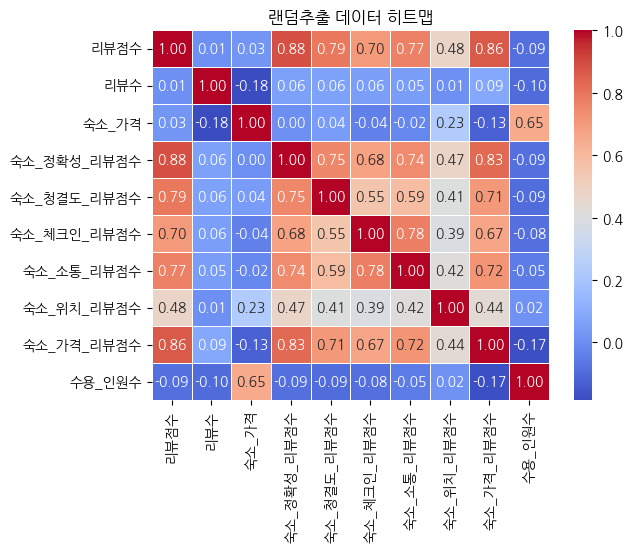

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = lists_10_corr.corr()


fig = plt.plot(figsize=(10, 7))


# 히트맵 그리기
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('랜덤추출 데이터 히트맵')




plt.show()

게스트 선호 별 리뷰데이터 EDA분석

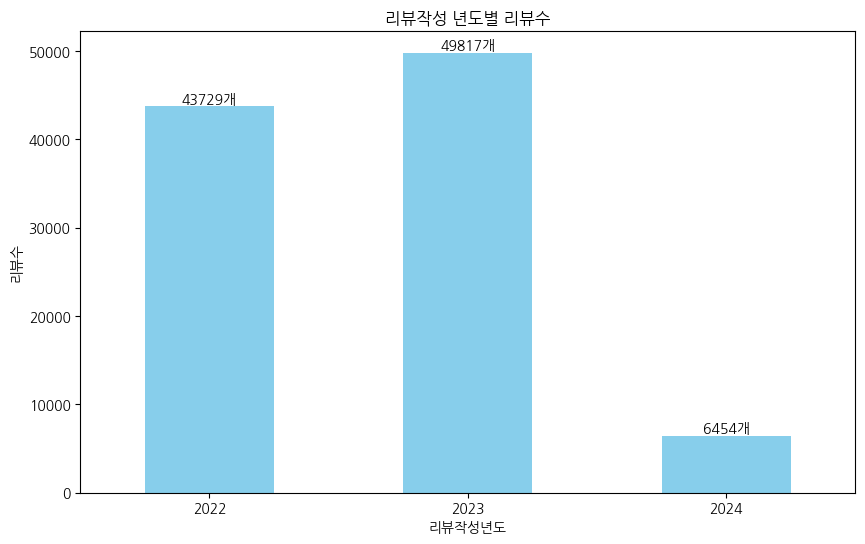

In [ ]:
#게스트선호 날짜별 리뷰 수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reviews_year = review_10['리뷰날짜'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = reviews_year.plot(kind='bar', color='skyblue')


plt.xlabel('리뷰작성년도')
plt.ylabel('리뷰수')
plt.title('리뷰작성 년도별 리뷰수')
plt.xticks(rotation=0)

for i in ax.containers:
    ax.bar_label(i, labels = [f"{v.get_height()}개" for v in i], label_type='edge')
plt.show()

In [ ]:
comment_by_id = review_10.groupby(review_10['숙소_id'])['리뷰'].count().sort_values(ascending=False)
comment_by_id[:15]

숙소_id
19670926    159
27833488    129
24982776    124
36137939    118
15988694    114
4748665     108
2126708     107
2213040     106
38871324    104
4332039     102
38071325     95
30760224     90
4461052      90
6631727      89
22584269     89
Name: 리뷰, dtype: int64

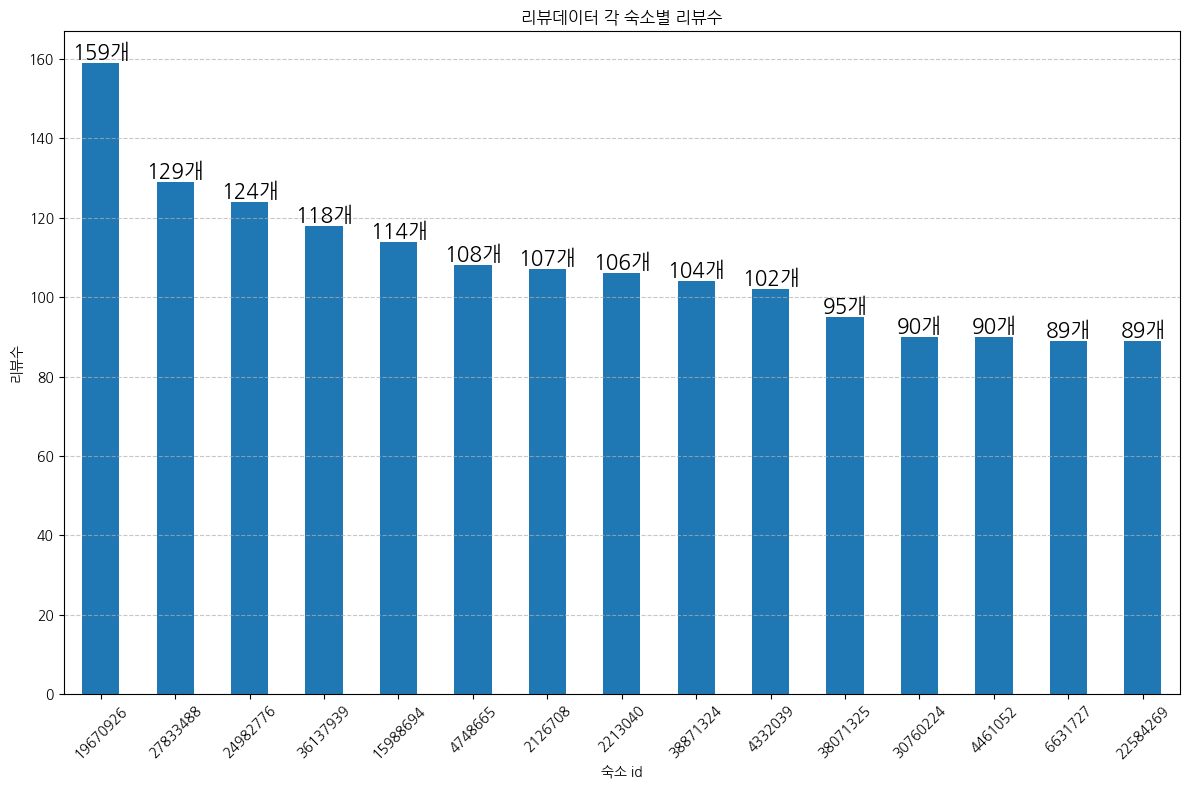

In [ ]:
# 막대 그래프 (Bar Plot)
comment_by_id[:15].plot(kind='bar', figsize=(12, 8))

for i, v in enumerate(comment_by_id[:15]):
    plt.text(i, v, str(v)+ "개", ha='center', va='bottom', fontsize=15)

plt.title('리뷰데이터 각 숙소별 리뷰수')
plt.xlabel('숙소 id')
plt.ylabel('리뷰수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

감성분석

In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
# !pip install textblob

import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

텍스트 전처리


- 소문자로 변경
- 토큰화
- 불용어 제거
- 어간 추출


게스트 선호인 숙소 텍스트 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  # 정규표현식

from functools import reduce  # 2차원 >> 1차원

from nltk.tokenize import word_tokenize  # word >> token
from nltk.corpus import stopwords  # stopwords >> 불용어
from nltk.stem import WordNetLemmatizer  # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

words = []


def Pretreatment(data, words_list):
    for title in data['리뷰']:
        en_words = re.sub(r"[^a-zA-Z]+", " ", str(title))  # 정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
        en_words_token = word_tokenize(en_words.lower())  # 변환된 단어를 토큰화
        en_words_stop = [word for word in en_words_token if not word in stopWords]  # 불용어 제거
        en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  # 어간 추출
        words_list.extend(en_words_lemma)  # words 리스트에 단어 추가

# 진행사항 표시
tqdm.pandas()

# Pretreatment 함수 호출
Pretreatment(review_10, words)


# 결과 출력 (샘플 10개 출력)
print(words[:10])


['home', 'adorable', 'fantastic', 'accommodation', 'husband', 'teen', 'daughter', 'cafe', 'across', 'street']


불용어 추가 제거

In [ ]:
# 기본 NLTK 불용어
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import re  # 정규표현식

from functools import reduce  # 2차원 >> 1차원

from nltk.tokenize import word_tokenize  # word >> token
from nltk.corpus import stopwords  # stopwords >> 불용어
from nltk.stem import WordNetLemmatizer  # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay','apartment','house','room','host','comfortable',
             'amazing','perfect','wonderful','excellent','lovely','highly','recommend','definitely', 'really',
             'london','u', 'everything', 'well', 'home','helpful','also','like','location','staying','could','need',
             'airbnb', 'london', 'host','everything','room']

# 전체 불용어 집합
custom_stopwords = stopwords.union(add_stopwords)

def remove_stopwords(tokenized_words, stopwords):

    filtered_words = [word for word in tokenized_words if word.lower() not in stopwords]
    return filtered_words



# 불용어 제거
filtered_words = remove_stopwords(words, custom_stopwords)




In [ ]:
find = 'airbnb'
if find in filtered_words:
    print('True')
else:
    print('False')

False


In [ ]:
import nltk
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

토큰화한 단어들 중 명사만 추출

- NN : 단수형, 셀수 없는 명사 (dog, information)
- NNS : 복수형 명사 (dogs, cars)
- NNP : 고유 명사 단수, (사람이름, 나라이름)
- NNPS : 고유명사 복수

In [ ]:
def extract_nouns(filtered_word_list):
    tagged_words = pos_tag(filtered_word_list)
    nouns = [word for word, pos in tagged_words if pos.startswith(('NN', 'NNS'))]
    return nouns

word_list_nouns = extract_nouns(filtered_words)



In [ ]:
word_list_nouns[:10]

['accommodation',
 'husband',
 'daughter',
 'cafe',
 'street',
 'walk',
 'rail',
 'see',
 'ease',
 'ana']

빈도수를 보자

In [ ]:
import nltk
from nltk import pos_tag
from collections import Counter

freq_nouns = Counter(word_list_nouns)


# 결과 출력
print("명사 빈도수:")
print(freq_nouns)


명사 빈도수:
Counter({'station': 13862, 'time': 11914, 'area': 10972, 'bathroom': 8389, 'day': 7940, 'bus': 7637, 'night': 7445, 'accommodation': 7359, 'minute': 7231, 'tube': 7044, 'communication': 6847, 'restaurant': 6805, 'walk': 6459, 'check': 6424, 'space': 6305, 'lot': 6247, 'kind': 6169, 'city': 5418, 'thanks': 5246, 'kitchen': 5187, 'thank': 4840, 'family': 4709, 'street': 4686, 'shop': 4638, 'access': 4616, 'bed': 4274, 'neighborhood': 4043, 'people': 3921, 'transport': 3899, 'convenient': 3826, 'experience': 3783, 'thing': 3742, 'distance': 3717, 'bedroom': 3555, 'train': 3538, 'park': 3527, 'feel': 3299, 'visit': 3264, 'trip': 3176, 'clean': 3166, 'bit': 3044, 'min': 3023, 'breakfast': 3011, 'price': 2933, 'question': 2895, 'value': 2891, 'coffee': 2859, 'line': 2759, 'floor': 2712, 'garden': 2705, 'cozy': 2678, 'amenity': 2667, 'work': 2605, 'person': 2521, 'problem': 2517, 'get': 2503, 'instruction': 2489, 'door': 2488, 'use': 2485, 'book': 2388, 'issue': 2361, 'help': 2289, 'w

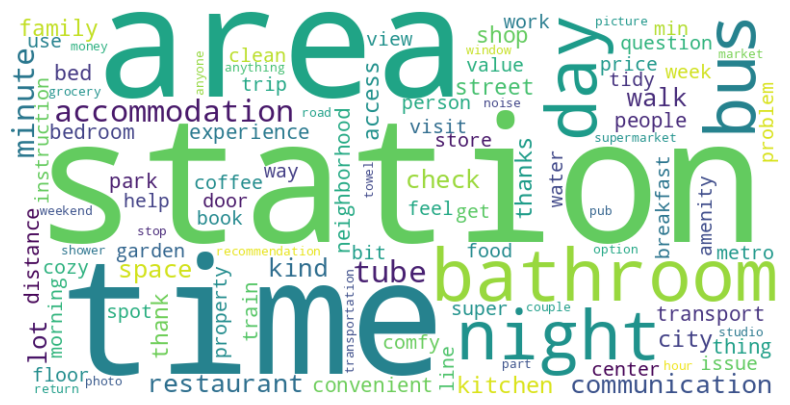

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = pd.Series(word_list_nouns).value_counts().head(100)

# 워드클라우드를 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

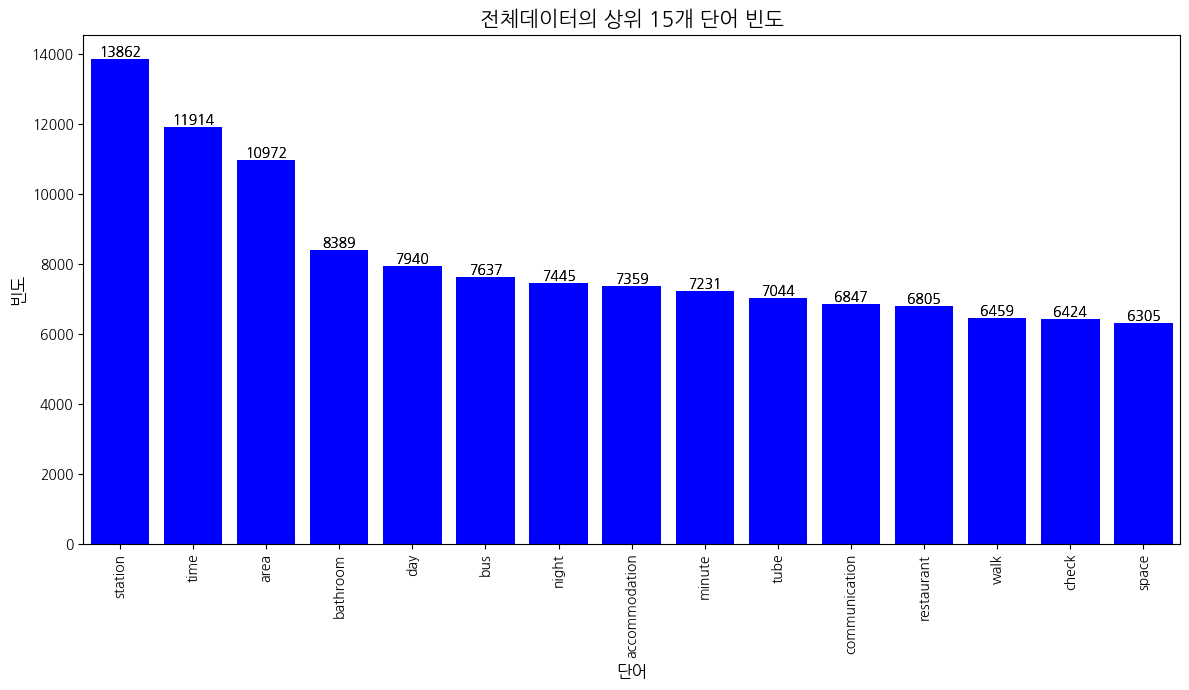

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# 단어 빈도 계산
word_counts = freq_nouns

# 상위 15개 단어 추출
top_word_counts = pd.Series(word_counts).sort_values(ascending=False).head(15)

# 서브플롯 생성
plt.figure(figsize=(12, 7))
ax = top_word_counts.plot(kind='bar')

# 긍정 리뷰 단어 빈도 가로 막대 그래프
plt.bar(top_word_counts.index, top_word_counts.values, color='blue')
plt.title('전체데이터의 상위 15개 단어 빈도', fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('빈도', fontsize=12)

#값도 표시
for i in ax.containers:
    ax.bar_label(i, labels = [f'{v.get_height()}' for v in i], label_type='edge')

# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


위치, 이동 관련 단어 빈도수가 높다 <br>


In [ ]:
!pip install gensim
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.5 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

감성 분석 - 단일문자열로 실행하면 안됨(빈도수에 씀) append 사용

- expend는 한 리스트안에 모든 단어를 넣는 의미 ex) ['apple,'banana','orange',...]
- append는 한 리스트에 각 리뷰의 단어를 뽑아 리스트로 담아서 넣는 의미 ex) [['apple','banna'],['orange']]

- 다시 전처리 후 토픽모델링 실행함

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


# 불용어 설정
stop_words = set(stopwords.words('english'))

# 추가 불용어 목록
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u']

# 전체 불용어 집합
custom_stopwords = stop_words.union(set(add_stopwords))


# 전처리 함수
def preprocess(data):
    positive_words = Counter()
    negative_words = Counter()

    for i, text in enumerate(data):
        text = text.lower() #소문자로 변경
        text = re.sub(r"[^a-zA-Z]+", " ",text)  # 정규표현식 사용, 영문 대소문자 제외한 문자를 공백으로 변경
        words = [word for word in text.split() if not word in custom_stopwords]  # 불용어 제거

        # 품사 태그
        tagged_words = pos_tag(words)
        nouns = [word for word, pos in tagged_words if pos in ('NN', 'NNS')]  # 명사 추출

        for word in nouns:
            word_blob = TextBlob(word)
            if word_blob.sentiment.polarity > 0:
                positive_words[word] += 1
            elif word_blob.sentiment.polarity < 0:
                negative_words[word] += 1

    return positive_words, negative_words

# 긍정 및 부정 단어 빈도수 추출
positive_words, negative_words = preprocess(review_10['리뷰'])

# 결과 출력
print("긍정 단어 빈도수 (Positive reviews):", positive_words)
print("부정 단어 빈도수 (Negative reviews):", negative_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


긍정 단어 빈도수 (Positive reviews): Counter({'kind': 6074, 'thanks': 5283, 'clean': 3618, 'super': 2084, 'tidy': 2067, 'pleasant': 1091, 'beautiful': 1084, 'warm': 965, 'cute': 936, 'ideal': 901, 'love': 837, 'welcome': 684, 'light': 580, 'enjoy': 497, 'fun': 492, 'secure': 447, 'superb': 445, 'calm': 384, 'right': 367, 'offers': 329, 'peaceful': 304, 'cool': 302, 'brilliant': 245, 'worth': 244, 'fine': 238, 'sure': 232, 'quick': 220, 'ok': 214, 'easy': 207, 'top': 199, 'sweet': 183, 'bright': 162, 'enjoyed': 151, 'okay': 148, 'seamless': 137, 'sound': 137, 'attentive': 133, 'decent': 132, 'absolute': 126, 'glad': 123, 'action': 123, 'accurate': 122, 'awesome': 115, 'fast': 111, 'smooth': 104, 'joy': 100, 'wise': 99, 'loud': 84, 'thoughtful': 81, 'straightforward': 79, 'adult': 79, 'pretty': 78, 'magnificent': 76, 'fit': 66, 'precise': 64, 'vibrant': 62, 'charming': 60, 'handy': 60, 'flawless': 58, 'fantastic': 57, 'delightful': 51, 'wow': 50, 'apt': 49, 'warmly': 49, 'respectful': 49, 'haha

10만개 추출한 리뷰데이터의 긍정 / 부정 단어 빈도수 시각화

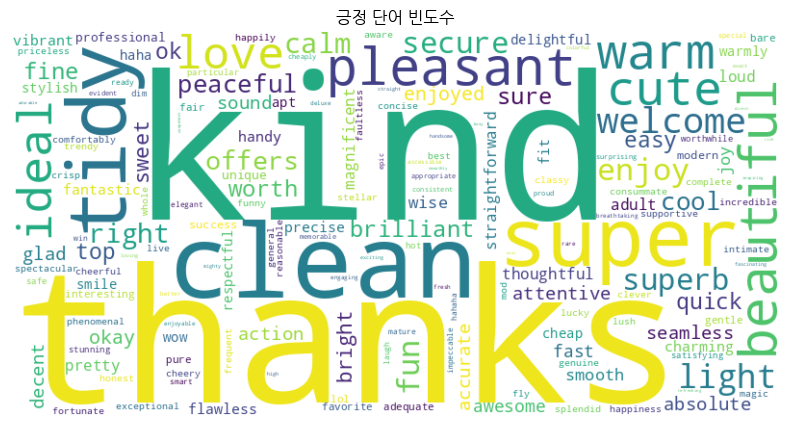

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 명사 워드클라우드 생성 및 시각화
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('긍정 단어 빈도수')
plt.show()

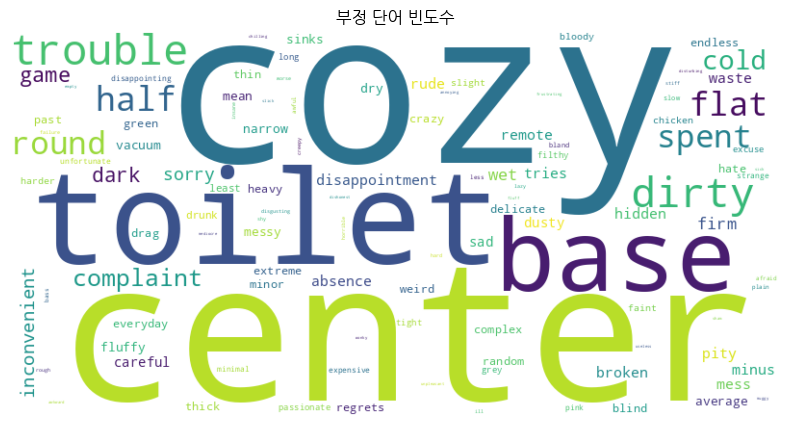

In [ ]:
# 부정 명사 워드클라우드 생성 및 시각화
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('부정 단어 빈도수')
plt.show()

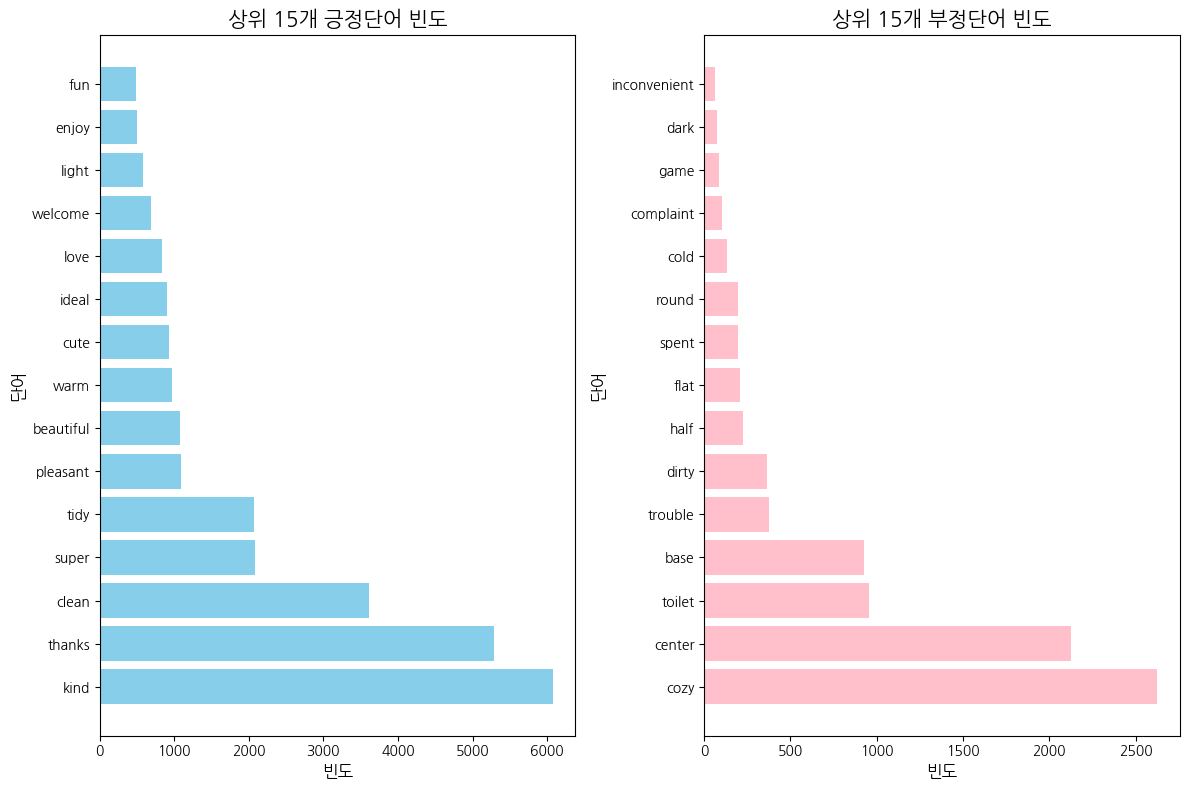

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# 단어 빈도 계산
word_counts_pos = Counter(positive_words)
word_counts_neg = Counter(negative_words)



# 상위 15개 단어 추출
top_word_counts_pos = pd.Series(word_counts_pos).sort_values(ascending=False).head(15)
top_word_counts_neg = pd.Series(word_counts_neg).sort_values(ascending=False).head(15)


# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# 게스트 선호 숙소의 긍정단어 빈도
axes[0].barh(top_word_counts_pos.index, top_word_counts_pos.values, color='skyblue')
axes[0].set_title('상위 15개 긍정단어 빈도', fontsize=15)
axes[0].set_xlabel('빈도', fontsize=12)
axes[0].set_ylabel('단어', fontsize=12,rotation=90)

# 게스트 선호 숙소의 부정단어 빈도
axes[1].barh(top_word_counts_neg.index, top_word_counts_neg.values, color='pink')
axes[1].set_title('상위 15개 부정단어 빈도', fontsize=15)
axes[1].set_xlabel('빈도', fontsize=12)
axes[1].set_ylabel('단어', fontsize=12,rotation=90)


# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

TF-IDF를 이용한 감성분석과 토픽모델링

In [ ]:
# !pip install scikit-learn

- 텍스트 전처리
- 소문자로 변경
- 불용어 제거

In [ ]:
import re

def reviews_Pretreatment(texts):
    cleaned_texts = []
    for text in texts:
        cleaned_text = text.lower()  # 소문자로 변환
        cleaned_text = re.sub(r'[\r\n]', ' ', cleaned_text)  # \r과 \n을 공백으로 변환
        cleaned_text = re.sub(r'[^a-zA-Z\s]+', '', cleaned_text)  # 특수문자 제거
        cleaned_texts.append(cleaned_text)
    return cleaned_texts

# 텍스트 전처리 수행
cleaned_reviews = reviews_Pretreatment(review_10['리뷰'])

review_10.loc[:, '리뷰'] = cleaned_reviews



In [ ]:
review_10

,숙소_id,리뷰날짜,리뷰
400819,21980231,2022-09-04,the home is so adorable fantastic accommodatio...
651246,27598715,2023-03-31,very pleasant apartment ideally located mins ...
430892,24507428,2023-06-09,we loved our stay at jacks place so close to ...
322584,17517605,2022-06-22,nice flat situated in a good location the phot...
229212,12004105,2022-07-06,the garden cottage was clean and comfortable w...
...,...,...,...
644379,23888981,2023-04-09,we highly recommend it great place and worth t...
75951,2008413,2024-02-14,great place for our one night stay
367887,20076727,2023-03-06,carolina was so much help for my brother and ...
273625,14325492,2022-08-15,everything was great adelaide is super kind


분석 모델 구축

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_sentiment_label(review):
    # TextBlob을 사용하여 감성 분석 수행
    analysis = TextBlob(review)
    return 1 if analysis.sentiment.polarity > 0 else 0

# 감성 분석을 수행하고 레이블 추가
review_10['감성분류'] = review_10['리뷰'].apply(get_sentiment_label)



In [ ]:

review_10['감성분류'].value_counts()

감성분류
1    96665
0     3335
Name: count, dtype: int64

In [ ]:
# tf-idf 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(review_10['리뷰'])

# 데이터와 레이블을 train/test로 분리
X_train, X_test, y_train, y_test = train_test_split(tfidf, review_10['감성분류'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# 모델 평가
score = lr.score(X_test, y_test)
print(f"모델 정확도 : {score}")

모델 정확도 : 0.98135


In [ ]:
from sklearn.model_selection import GridSearchCV
#params : 하이퍼파라미터 그리드를 정의하는 딕셔너리
# 'C' (규제 파라미터) : 모델의 복잡도를 조절 / 낮은 c값 강한 규제를 의미/ 높은 c값은 약한 규제
params = {'C' : [1, 3, 3.5, 4, 4.5, 5]}
lr_grid_cv = GridSearchCV(lr, param_grid=params, cv = 3, scoring = 'accuracy', verbose = 1)

In [ ]:
#감성 분류 모델 구축

lr_grid_cv.fit(tfidf, review_10['감성분류'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [ ]:
print(lr_grid_cv.best_params_,  round(lr_grid_cv.best_score_, 3)) #약한 규제

{'C': 5} 0.986


In [ ]:
# 최적 매개변수의 best 모델 >> 저장
lr_best = lr_grid_cv.best_estimator_

In [ ]:
#평가용 데이터의 피처 벡터화 feature >> vector

y_predict = lr_best.predict(tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도: ', round(accuracy_score(review_10['감성분류'], y_predict),3))

감성 분석 정확도:  0.994


정확도가 0.994인 예측값을 review_10 데이터에 넣기

In [ ]:
review_10['감성분류'] = y_predict


In [ ]:
review_10['감성분류'].value_counts()

감성분류
1    97126
0     2874
Name: count, dtype: int64

감성 분석 결과 확인

In [ ]:
#T

columns_name = ['숙소_id','리뷰날짜', '리뷰', '감성분류']
neg_reviews = []
pos_reviews = []

for i, data in review_10.iterrows():
    id = data['숙소_id']
    date = data['리뷰날짜']
    review = data['리뷰']
    sentiment = data['감성분류']

    if sentiment == 0:
        neg_reviews.append([id, date, review, sentiment])
    else:
        pos_reviews.append([id, date, review, sentiment])

neg_reviews = pd.DataFrame(neg_reviews, columns=columns_name)
pos_reviews = pd.DataFrame(pos_reviews, columns=columns_name)

In [ ]:
print(neg_reviews.shape)
print(pos_reviews.shape)


(2874, 4)
(97126, 4)


불용어 제거를 긍정/부정 따로 제거함

긍정 감성 분석 시각화 ( T/F ) 같이

In [ ]:



import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u','thank','thanks']

custom_stopwords = nltk_stopwords.union(add_stopwords)

def extract_nouns(text, stopwords):

   # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(filtered_words)
    pos_nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS']]

    return pos_nouns

# 모든 리뷰에 대해 명사 추출 수행
pos_reviews['명사_리뷰'] = pos_reviews['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))

# 명사_리뷰 리스트가 비어 있는 행 제거
pos_reviews = pos_reviews[pos_reviews['명사_리뷰'].map(len) > 0]




In [ ]:
pos_nouns = pos_reviews['명사_리뷰'].tolist()

pos_nouns_join = []

for d in pos_nouns:
    d2 = [w for w in d if len(w) > 1]
    pos_nouns_join.append(" ".join(d2))



print(pos_nouns_join)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



부정 감성 분석 시각화

In [ ]:

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

# 불용어 설정
nltk_stopwords = set(stopwords.words('english'))

add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room','u','thank','thanks']

custom_stopwords = nltk_stopwords.union(add_stopwords)

def extract_nouns(text, stopwords):

   # 토큰화
    words = word_tokenize(text)

    # 불용어 제거
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # 품사 태그 부여 및 명사 필터링
    tagged_words = pos_tag(filtered_words)
    pos_nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS']]

    return pos_nouns

# 모든 리뷰에 대해 명사 추출 수행
neg_reviews['명사_리뷰'] = neg_reviews['리뷰'].apply(lambda x: extract_nouns(x, custom_stopwords))


# 명사_리뷰 리스트가 비어 있는 행 제거
neg_reviews = neg_reviews[neg_reviews['명사_리뷰'].map(len) > 0]



In [ ]:
neg_nouns = neg_reviews['명사_리뷰'].tolist()

neg_nouns_join = []


for d in neg_nouns:
    d2 = [w for w in d if len(w) > 1]
    neg_nouns_join.append(" ".join(d2))



print(neg_nouns_join)


['problems owner share bed sofa sleep', 'access terrace bit bathroom hall bit needs', 'communication fast problem luggage help bitch im use musemwo shori door im anything bit', 'didnt asap', 'dark council block furnishings hairs bathroom window wouldnt bed filthy sheet change guest', 'comment noises street rest residence allows kitchen keys', 'wardrobe shelves drawers couldnt use sofa dirty sofa cushions blankets reach ceiling night bathroom people situation', 'cant fault seb', 'problems', 'flexibility issues intermittent key appliances hair dryer werent plan travel plans water enjoy time', 'week mario fault', 'space crew music', 'ticks boxes', 'hours airport', 'bharati hope england', 'picture id show arrival site property manager online lot reviews area locks doors text number feel', 'places', 'julianas convenient juliana mile base south', 'people person person sofa sofa', 'roof elevator', 'sallys night bedroom block flats tell lot effort style bus stop bit station drawback cold cold 

TF-IDF 활용 , DTM 구성

In [ ]:
#긍정 감성 단어 추출
pos_tfidf = TfidfVectorizer()
pos_dtm = pos_tfidf.fit_transform(pos_nouns_join)



In [ ]:
pos_vocab = dict()

for i, word in enumerate(pos_tfidf.get_feature_names_out()):
    pos_vocab[word] = pos_dtm.getcol(i).sum()

In [ ]:
pos_vocab

{'aa': 1.5654249720671614,
 'aaa': 2.623304103571471,
 'aaaaand': 0.6491586071693066,
 'aaah': 0.401571644113833,
 'aall': 0.8497280872449163,
 'aarhus': 0.4265656525239492,
 'aaron': 14.038566820006253,
 'aarons': 7.15040359398629,
 'abb': 0.4395920681023519,
 'abba': 4.826131274711229,
 'abbeville': 1.1647787450092797,
 'abbey': 18.48079798283133,
 'abbeys': 4.784687468933259,
 'abbie': 0.8815468155745999,
 'abby': 3.8075656662837316,
 'abbys': 0.6297208498208323,
 'abd': 1.429624365995892,
 'abdalla': 0.49574520819074236,
 'abdul': 7.706205051271064,
 'abduls': 2.3313289682487865,
 'aberdeen': 0.31263523308647984,
 'abi': 15.59064212508737,
 'abigail': 0.4661770778663333,
 'abigails': 1.5596169043796664,
 'abilities': 0.9267644313636157,
 'ability': 12.174508986912663,
 'abiola': 4.590163121407998,
 'abiolas': 1.0,
 'abis': 4.707643508939955,
 'abit': 1.5597715400304342,
 'abiut': 0.45340369384587736,
 'ablto': 0.4829695656453228,
 'abnb': 1.938651956974854,
 'abnormal': 0.317644483

In [ ]:
#상위 15위 긍정 단어
pos_words = sorted(pos_vocab.items(), key = lambda x : x[1], reverse = True)
print(pos_words[:15])


[('time', 2063.12241473531), ('station', 1994.5193389760075), ('area', 1992.8752322695382), ('communication', 1822.2641139079515), ('accommodation', 1750.601629189715), ('hosts', 1705.1556965481752), ('kind', 1496.1509179232935), ('clean', 1442.7772043006214), ('restaurants', 1344.4757026755183), ('space', 1313.3885275365424), ('bathroom', 1263.3165910577673), ('tube', 1212.2203798733879), ('minutes', 1204.0011075116172), ('city', 1157.8410467086253), ('family', 1093.7942426719405)]


In [ ]:
#부정 감성 단어 추출

neg_tfidf = TfidfVectorizer()
neg_dtm = neg_tfidf.fit_transform(neg_nouns_join)



In [ ]:
neg_vocab = dict()

for i, word in enumerate(neg_tfidf.get_feature_names_out()):
    neg_vocab[word] = neg_dtm.getcol(i).sum()


In [ ]:
neg_words = sorted(neg_vocab.items(), key = lambda x : x[1], reverse = True)
print(neg_words[:15])

[('accommodation', 49.5105972211672), ('time', 48.12334682092883), ('bathroom', 45.128423922193015), ('convenient', 41.839346626879525), ('night', 36.922281999127705), ('dirty', 29.905738482644708), ('people', 28.057176319615735), ('cozy', 27.465260918653208), ('water', 27.22470636622139), ('station', 26.420827669564837), ('area', 26.010299781843294), ('door', 25.224977098316344), ('day', 25.22158944673043), ('bed', 25.009456607408), ('floor', 24.785774747863467)]


결과 시각화

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '/content/drive/MyDrive/Weekly_project_TeamID/예진/NanumGothic.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 파일 확인
import os
if not os.path.exists(font_path):
    print("폰트 파일을 찾을 수 없습니다.")

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)


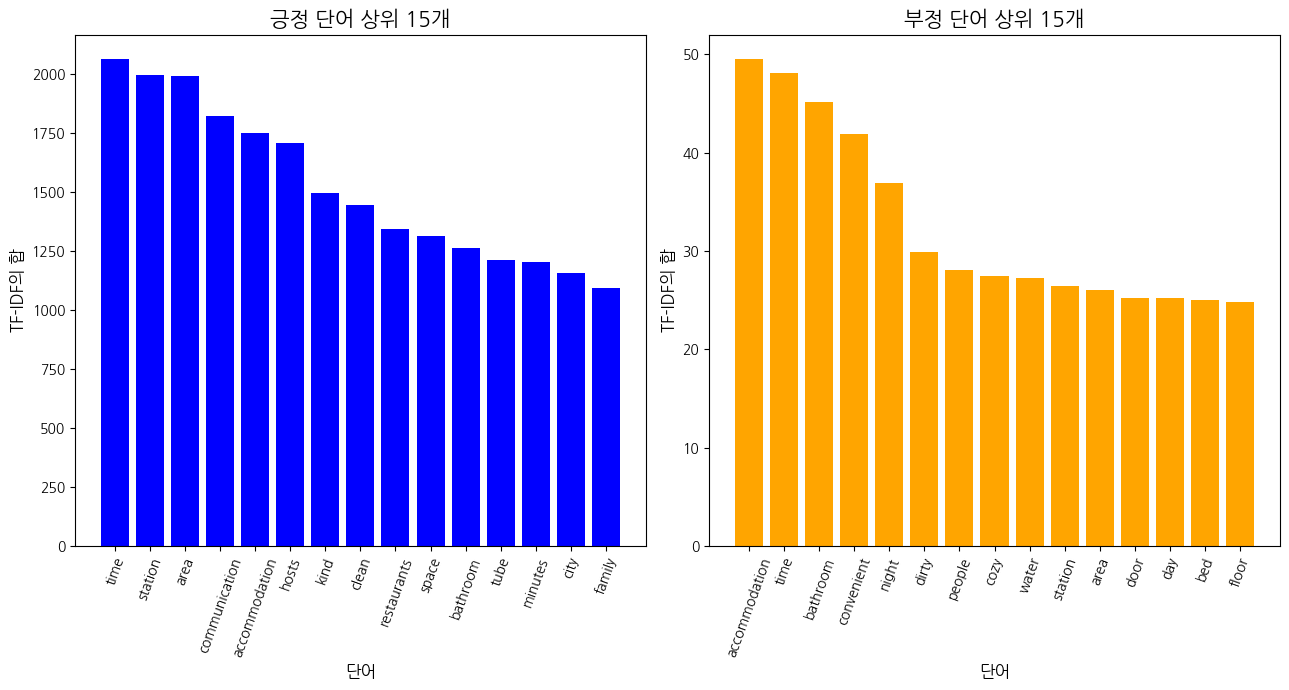

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from collections import Counter


max_words = 15  # 상위 단어 개수 설정

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))

# 긍정 리뷰 상위 단어 막대 그래프
axes[0].bar(range(max_words), [i[1] for i in pos_words[:max_words]], color="blue")
axes[0].set_title("긍정 단어 상위 %d개" % max_words, fontsize=15)
axes[0].set_xlabel("단어", fontsize=12)
axes[0].set_ylabel("TF-IDF의 합", fontsize=12)
axes[0].set_xticks(range(max_words))
axes[0].set_xticklabels([i[0] for i in pos_words[:max_words]], rotation=70)

# 부정 리뷰 상위 단어 막대 그래프
axes[1].bar(range(max_words), [i[1] for i in neg_words[:max_words]], color="orange")
axes[1].set_title("부정 단어 상위 %d개" % max_words, fontsize=15)
axes[1].set_xlabel("단어", fontsize=12)
axes[1].set_ylabel("TF-IDF의 합", fontsize=12)
axes[1].set_xticks(range(max_words))
axes[1].set_xticklabels([i[0] for i in neg_words[:max_words]], rotation=70)

# 서브플롯 사이의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


토픽 모델링

- distribution 값은 이 리뷰가 각 토픽에 속할 확률

In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# NLTK 데이터 다운로드
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# 불용어 설정
stop_words = set(stopwords.words('english'))

# 추가 불용어 목록
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room', 'u','thank','thanks']

# 전체 불용어 집합
custom_stopwords = stop_words.union(set(add_stopwords))

# 리뷰 전처리 함수
def preprocess_review(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r'[\r\n]', ' ', text)  # \r과 \n을 공백으로 변환
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # 특수문자 제거
    words = word_tokenize(text)  # 단어 토큰화
    words = [word for word in words if word not in custom_stopwords]  # 불용어 제거
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos in ('NN', 'NNS')]  # 명사 추출
    return ' '.join(nouns)



# 리뷰 전처리 수행
cleaned_reviews = [preprocess_review(review) for review in review_10['리뷰']]

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(cleaned_reviews)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# LDA 모델 생성 및 학습
from sklearn.decomposition import LatentDirichletAllocation


lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_model.fit(tfidf)

# 리뷰별 토픽 분포 예측
topic_distribution = lda_model.transform(tfidf)

# 각 리뷰의 토픽 분포 확인
for i, review in enumerate(review_10['리뷰'][:10]):  # 첫 10개의 리뷰만 출력
    print(f"토픽 {i+1}:")
    print(review)
    print(f"토픽 기여도: {topic_distribution[i]}")
    print()
print("*" * 50)


토픽 1:
the home is so adorable fantastic accommodations for me and my husband and teen daughter the cafe across the street was a blessing and we were able to walk about take the rail and see sights with ease ana was amazing she communicated with us clearly and answered our questions readily and thoroughly
토픽 기여도: [0.05153722 0.79546236 0.05085668 0.0508507  0.05129304]

토픽 2:
very pleasant apartment ideally located  mins walk from highbury tube station silent neighborhood despite thin walls i highly recommend renting this apartment for a person or a couple
토픽 기여도: [0.29026164 0.32264132 0.2718688  0.05681616 0.05841207]

토픽 3:
we loved  our stay at jacks place so close to transport the vibrant high street and a lovely walk away from stoke newington jacks place is spacious quiet clean and very well equipped for a comfortable stay with great facilities jack is a great host with clear communication and information would recommend very highly and we would absolutely stay again thanks for  s

리뷰데이터 토픽모델링

In [ ]:
# 각 토픽에 해당하는 단어 추출
def get_top_words(model, feature_names, n_top_words):
    top_words_dict_t = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_t = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_dict_t[f"Topic {topic_idx}"] = top_words_t
    return top_words_dict_t

n_top_words = 15
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# 각 토픽의 상위 단어 출력
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

Topic 0: communication, bathroom, experience, night, property, time, book, kitchen, day, bit, neighbourhood, accommodation, area, couldnt, floor
Topic 1: station, clean, area, hosts, restaurants, time, tube, value, minutes, bus, convenient, city, walk, access, super
Topic 2: pleasant, beautiful, spotless, im, future, quality, visit, connections, owner, balcony, solo, shes, kind, accomodation, guy
Topic 3: accommodation, price, cozy, cute, staff, kings, photos, pleasure, return, cross, foot, environment, fun, gardens, services
Topic 4: comfy, kind, space, transportation, view, questions, transport, time, breakfast, area, garden, person, bed, people, ideal


<예시> <br>

Review 1:
We had a great trip, the airbnb is great and very well located <br>
Topic Distribution: <br>
[0.0668716   0.06687163  0.06861975
 0.06687151  0.73076551] <br>

<br>

- 각 확률이 5개가 있다. (토픽이 5개가 나왔다는 의미)
- 각 수치가 높을수록 해당 토픽에 속할 확률이 높다는 것

- 5개중 가장 높은 수치가 0.7307 >> 토픽 5번에 속할 확률이 높다는 뜻

find_all

긍정/부정 별 토픽 모델링 시각화

html 주소로 저장

In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel

def preprocess_review(text_nouns, output_html):
    # 단어 사전 및 코퍼스 생성
    dictionary = corpora.Dictionary(text_nouns)
    corpus = [dictionary.doc2bow(text) for text in text_nouns]

    # LDA 모델 학습
    num_topics = 5  # 토픽 수 설정
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # PyLDAvis 시각화
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

    # HTML 파일로 저장
    pyLDAvis.save_html(vis, output_html)
    print(f"LDA visualization saved to {output_html}")

# HTML 파일로 저장
preprocess_review(neg_nouns, '랜덤10만개_부정단어_토픽모델링.html')

LDA visualization saved to 랜덤10만개_부정단어_토픽모델링.html


긍정 단어 토픽 모델링 시각화

In [ ]:
# 단어 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(pos_nouns)
corpus = [dictionary.doc2bow(text) for text in pos_nouns]

# LDA 모델 학습
num_topics = 5  # 토픽 수 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 각 토픽 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

# PyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
Words: 0.033*"bathroom" + 0.020*"night" + 0.020*"kitchen" + 0.017*"bed" + 0.015*"bit" + 0.013*"people" + 0.013*"bedroom" + 0.013*"floor" + 0.012*"day" + 0.012*"use"
Topic: 1 
Words: 0.071*"communication" + 0.036*"check" + 0.036*"hosts" + 0.032*"value" + 0.019*"money" + 0.019*"property" + 0.017*"checkin" + 0.016*"instructions" + 0.013*"time" + 0.012*"pleasant"
Topic: 2 
Words: 0.032*"kind" + 0.028*"time" + 0.023*"experience" + 0.019*"clean" + 0.015*"hosts" + 0.014*"space" + 0.013*"cozy" + 0.013*"breakfast" + 0.013*"person" + 0.012*"area"
Topic: 3 
Words: 0.059*"station" + 0.037*"restaurants" + 0.029*"tube" + 0.028*"bus" + 0.026*"minutes" + 0.025*"walk" + 0.023*"area" + 0.019*"distance" + 0.017*"shops" + 0.017*"street"
Topic: 4 
Words: 0.059*"accommodation" + 0.036*"time" + 0.033*"city" + 0.024*"family" + 0.023*"transport" + 0.019*"center" + 0.016*"days" + 0.015*"area" + 0.014*"visit" + 0.011*"minutes"


빈도수가 가장 많이 나온 단어 : time, station, communication, minutes, restaurants <br>

토픽 1 : station(역), minutes(분), restaurants(레스토랑), tube(지하철), bus(버스), walk(도보), area(지역), city(도시), shops(상점), distance(거리), street(거리), access(접근), park(공원), minute(분), train(기차), stations(역들), center(중심), neighborhood(이웃), lots(많은), convenient(편리한), family(가족), line(노선), road(도로), market(시장), min(분), transport(교통), buses(버스들), places(장소들), time(시간), mins(분)

- 토픽 1 : 숙소 위치와 접근성

토픽 2 : bathroom(욕실), kitchen(부엌), space(공간), night(밤), bed(침대), bedroom(침실), day(낮), use(사용), people(사람들), breakfast(아침식사), water(물), floor(층), morning(아침), bit(조금), coffee(커피), didnt(하지 않았다), problem(문제), rooms(방들), area(지역), beds(침대들), door(문), shower(샤워), street(거리), thing(물건), things(물건들), towels(수건들), guests(손님들), work(일), tea(차), time(시간)

- 토픽 2 : 숙소 시설

토픽 3 : thanks(감사), time(시간), value(가치), communication(소통), check(확인), kind(친절한), thank(감사), experience(경험), trip(여행), price(가격), family(가족), money(돈), hosts(호스트들), day(낮), days(날들), space(공간), area(지역), checkin(체크인), times(시간들), person(사람), feel(느낌), studio(스튜디오), checkout(체크아웃), welcoming(환영하는), night(밤), people(사람들), spot(장소), help(도움), super(슈퍼), city(도시)

- 토픽 3 : 호스트와 소통

토픽 4 : time(시간), cozy(아늑한), neighborhood(이웃), experience(경험), book(책), area(지역), places(장소들), visit(방문), hospitality(환대), couldnt(할 수 없었다), beautiful(아름다운), space(공간), kind(친절한), anyone(누구든), feel(느낌), transportation(교통), love(사랑), pictures(사진들), help(도움), im(나는), heart(마음), communication(소통), lot(많은), view(뷰), garden(정원), city(도시), responsive(반응이 빠른), anything(무엇이든), james(제임스), return(돌아오다)

- 토픽 4 : 숙소 주변 환경, 분위기

토픽 5 : accommodation(숙소), hosts(호스트들), clean(깨끗한), transport(교통), thank(감사), convenient(편리한), kind(친절한), breakfast(아침식사), area(지역), tidy(깔끔한), time(시간), property(재산), questions(질문들), communication(소통), comfy(편안한), pleasant(유쾌한), bed(침대), cosy(아늑한), bathroom(욕실), links(연결), amenities(편의시설), welcome(환영), facilities(시설들), cats(고양이들), feel(느낌), family(가족), response(응답), cute(귀여운), weekend(주말), access(접근)

- 토픽 5 : 숙소 편의시설과 청결도

부정 단어 토픽 모델링 시각화

In [ ]:
dictionary = corpora.Dictionary(neg_nouns)
corpus = [dictionary.doc2bow(text) for text in neg_nouns]

# LDA 모델 학습
num_topics = 5  # 토픽 수 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 각 토픽 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

# PyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
Words: 0.012*"day" + 0.011*"work" + 0.010*"nights" + 0.009*"people" + 0.008*"problem" + 0.008*"shower" + 0.008*"floor" + 0.008*"hotel" + 0.008*"didnt" + 0.008*"time"
Topic: 1 
Words: 0.018*"door" + 0.017*"bathroom" + 0.013*"night" + 0.011*"window" + 0.011*"use" + 0.011*"shower" + 0.010*"bedroom" + 0.010*"days" + 0.009*"issue" + 0.009*"beds"
Topic: 2 
Words: 0.025*"time" + 0.021*"night" + 0.018*"kitchen" + 0.017*"dirty" + 0.014*"accommodation" + 0.014*"day" + 0.012*"check" + 0.011*"bathroom" + 0.011*"building" + 0.011*"minute"
Topic: 3 
Words: 0.029*"accommodation" + 0.021*"dirty" + 0.019*"water" + 0.018*"owner" + 0.015*"floor" + 0.013*"nothing" + 0.013*"bathroom" + 0.013*"problem" + 0.012*"refund" + 0.011*"book"
Topic: 4 
Words: 0.023*"station" + 0.023*"convenient" + 0.018*"trs" + 0.016*"get" + 0.013*"minutes" + 0.013*"codes" + 0.013*"bit" + 0.011*"pleasure" + 0.010*"time" + 0.009*"night"


빈도수가 많은 단어 : bathroom, floor, kitchen, night, time

토픽 1 : bathroom(욕실), day(낮), water(물), station(역), didnt(하지 않았다), floor(층), accommodation(숙소), kitchen(부엌), towels(수건들), dirty(더러운), toilet(화장실), bit(조금), photos(사진들), days(날들), use(사용), work(일), shower(샤워), smell(냄새), lot(많은), bed(침대), sheets(침대 시트), guests(손님들), things(물건들), area(지역), heater(난방기), paper(종이), night(밤), people(사람들), problem(문제), time(시간)

- 토픽 1 : 숙소 내부 시설 과 청결도

토픽 2 : price(가격), convenient(편리한), door(문), bathroom(욕실), night(밤), time(시간), people(사람들), rooms(방들), area(지역), station(역), kitchen(부엌), days(날들), accommodation(숙소), dont(하지 않는다), hours(시간), dirty(더러운), floor(층), luggage(짐), property(재산), didnt(하지 않았다), messages(메시지들), experience(경험), access(접근), side(측면), space(공간), shower(샤워), bedroom(침실), tube(지하철), use(사용), quality(품질)

- 토픽 2 : 숙소 가격, 편리함, 청결도

토픽 3 : cozy(아늑한), experience(경험), bathroom(욕실), value(가치), bedroom(침실), night(밤), dont(하지 않는다), time(시간), money(돈), communication(소통), lock(자물쇠), dirty(더러운), work(일), check(확인), people(사람들), base(기반), door(문), minutes(분), get(얻다), review(리뷰), person(사람), water(물), way(방법), family(가족), bit(조금), accommodation(숙소), issues(문제들), keys(열쇠들), sheets(침대 시트), bed(침대)

- 토픽 3 : 숙소의 편안함, 이용경험

토픽 4 : time(시간), dirty(더러운), accommodation(숙소), day(낮), days(날들), bathroom(욕실), door(문), pleasure(즐거움), studio(스튜디오), bed(침대), floor(층), hour(시간), work(일), kitchen(부엌), use(사용), night(밤), station(역), im(나는), hotel(호텔), morning(아침), stairs(계단), windows(창문들), shower(샤워), didnt(하지 않았다), clothes(옷), hosts(호스트들), property(재산), toilet(화장실), pictures(사진들), described(설명된)

 - 토픽 4 : 숙소의 편의시설 , 청결도

 토픽 5 : thank(감사), night(밤), floor(층), time(시간), visit(방문), book(책), description(설명), people(사람들), expectations(기대), bed(침대), noise(소음), experience(경험), space(공간), walls(벽들), hospitality(환대), accommodation(숙소), nights(밤들), dont(하지 않는다), area(지역), water(물), photos(사진들), day(낮), x(엑스), return(돌아오다), days(날들), guests(손님들), message(메시지), feels(느낌), bedroom(침실), owner(소유자)

- 토픽 5 : 숙소 이용경험과 기대치

In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel

def preprocess_review(text_nouns):
    # 단어 사전 및 코퍼스 생성
    dictionary = corpora.Dictionary(text_nouns)
    corpus = [dictionary.doc2bow(text) for text in text_nouns]

    # LDA 모델 학습
    num_topics = 5  # 토픽 수 설정
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # 각 토픽 출력
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic: {idx} \n Words: {topic}")

    # PyLDAvis 시각화
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)

preprocess_review(pos_nouns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic: 0 
 Words: 0.036*"time" + 0.029*"hosts" + 0.024*"space" + 0.018*"experience" + 0.016*"area" + 0.016*"family" + 0.014*"book" + 0.014*"breakfast" + 0.013*"studio" + 0.012*"trip"
Topic: 1 
 Words: 0.067*"accommodation" + 0.039*"communication" + 0.036*"clean" + 0.035*"transport" + 0.026*"area" + 0.020*"city" + 0.019*"convenient" + 0.017*"tidy" + 0.015*"neighborhood" + 0.015*"access"
Topic: 2 
 Words: 0.027*"value" + 0.027*"time" + 0.027*"kind" + 0.025*"price" + 0.023*"person" + 0.018*"help" + 0.017*"money" + 0.011*"communication" + 0.009*"days" + 0.008*"anything"
Topic: 3 
 Words: 0.040*"bathroom" + 0.022*"kitchen" + 0.020*"night" + 0.016*"bed" + 0.015*"check" + 0.014*"bedroom" + 0.013*"floor" + 0.013*"space" + 0.012*"use" + 0.012*"water"
Topic: 4 
 Words: 0.056*"station" + 0.035*"restaurants" + 0.028*"minutes" + 0.027*"tube" + 0.026*"bus" + 0.024*"walk" + 0.018*"distance" + 0.017*"city" + 0.017*"area" + 0.016*"shops"


word2vec 기법

- 자연어 처리에서 단어를 벡터로 변환하여 단어 간의 유사성을 계산하는 데 사용 (차원축소)
- 유사성은 0과 1사이의 값으로 나타남
- 1에 가까울수록 유사성이 있다는 점

- 0.8 이상: 매우 높은 유사성
- 0.6 - 0.8: 높은 유사성
- 0.4 - 0.6: 중간 정도의 유사성
- 0.2 - 0.4: 낮은 유사성
- 0.2 이하: 매우 낮은 유사성

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

# 예시 텍스트 데이터
texts = review_10['리뷰']

# 기본 NLTK 불용어와 추가 불용어 목록 통합
stop_words = set(stopwords.words('english'))
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room', 'u']

custom_stopwords = stop_words.union(add_stopwords)

# 텍스트 전처리 함수 (명사만 추출)
def preprocess(text):
    words = word_tokenize(text.lower()) #소문자로 변환
    words = [word for word in words if word.isalpha() and word not in custom_stopwords] #불용어제거
    nouns = [word for word, pos in pos_tag(words) if pos in ['NN', 'NNS']] #명사 추출
    return nouns

# 텍스트 데이터 전처리
processed_texts = [preprocess(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



단어 빈도수가 높은 단어들로 실행해보자

In [ ]:
# 단어 빈도 계산
all_words = [word for text in processed_texts for word in text]
word_freq = Counter(all_words)

# 상위 n개의 빈도 높은 단어 선택
n = 50  # 예시로 상위 10개의 단어를 선택
top_words = [word for word, freq in word_freq.most_common(n)]

# 상위 n개의 빈도 높은 단어로만 구성된 텍스트 데이터 생성
filtered_texts = [[word for word in text if word in top_words] for text in processed_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Word2Vec 모델 학습
model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=1, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# 단어 간 유사성 확인
word1 = 'bed'
word2 = 'person'

if word1 in model.wv and word2 in model.wv:
    similarity = model.wv.similarity(word1, word2)
    print(f"'{word1}'와 '{word2}'의 유사성: {similarity:.4f}")
    if similarity > 0.8:
        print("두 단어는 매우 높은 유사성을 가집니다.")
    elif similarity > 0.6:
        print("두 단어는 높은 유사성을 가집니다.")
    elif similarity > 0.4:
        print("두 단어는 중간 정도의 유사성을 가집니다.")
    elif similarity > 0.2:
        print("두 단어는 낮은 유사성을 가집니다.")
    else:
        print("두 단어는 매우 낮은 유사성을 가집니다.")
else:
    print(f"'{word1}' 또는 '{word2}'가 모델의 어휘에 없습니다.")



'bed'와 'person'의 유사성: 0.3783
두 단어는 낮은 유사성을 가집니다.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np

# 여러 단어 그룹 정의
group1 = ['station', 'restaurants', 'minutes', 'bus', 'tube', 'area', 'walk', 'city', 'transport', 'distance', 'access', 'shops', 'train', 'minute', 'park']
group2 = ['convenient', 'street', 'center', 'neighborhood', 'line', 'time', 'lots', 'hosts', 'places', 'stations','bathroom', 'buses', 'min', 'visit', 'mins']

# 단어 그룹의 평균 벡터 계산 함수
def get_mean_vector(model, words):
    # 유효한 단어 필터링
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        raise ValueError("모든 단어가 모델의 어휘에 없습니다.")

    # 평균 벡터 계산
    mean_vector = np.mean([model.wv[word] for word in valid_words], axis=0)
    return mean_vector

# 유사성 계산
try:
    mean_vector1 = get_mean_vector(model, group1)
    mean_vector2 = get_mean_vector(model, group2)

    similarity = np.dot(mean_vector1, mean_vector2) / (np.linalg.norm(mean_vector1) * np.linalg.norm(mean_vector2))
    print(f"group1과 gruop2의 유사성: {similarity:.4f}")
except ValueError as e:
    print(e)

group1과 gruop2의 유사성: 0.9509


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# 가장 유사한 단어 찾기
word = 'bathroom'
if word in model.wv:
    similar_words = model.wv.most_similar(word, topn=5)
    print(f"'{word}'와 가장 유사한 단어들:")
    for similar_word, score in similar_words:
        print(f"  {similar_word}: {score:.4f}")
else:
    print(f"'{word}'가 모델의 어휘에 없습니다.")

'bathroom'와 가장 유사한 단어들:
  bath: 0.8133
  toilet: 0.7845
  acomodate: 0.7808
  shower: 0.7754
  master: 0.7739


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



시각화

- pos_nouns
- neg_nouns
- processed_texts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



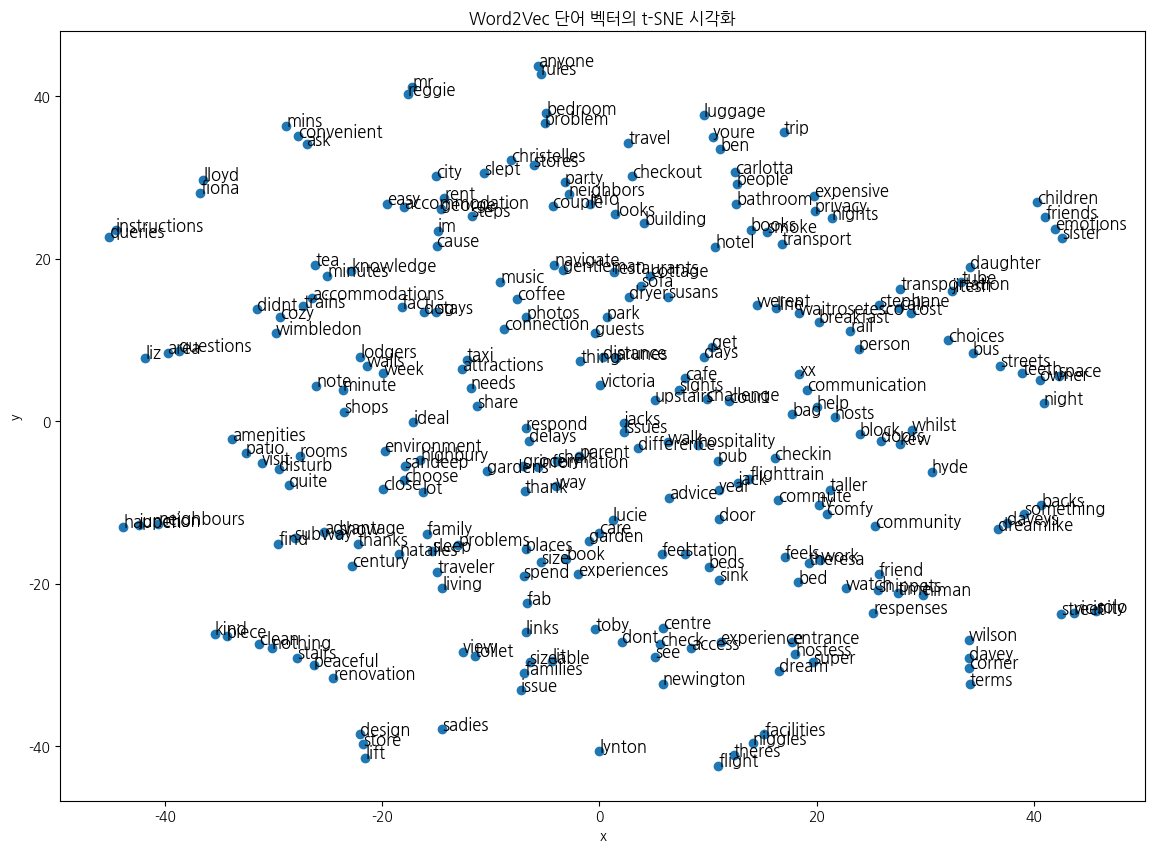

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Word2Vec 모델 학습
model = Word2Vec(sentences=processed_texts[:50], vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 추출 및 t-SNE 변환
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

tsne = TSNE(n_components=2, random_state=0,perplexity=5)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# t-SNE 결과를 DataFrame으로 변환
df = pd.DataFrame(word_vectors_tsne, index=words, columns=['x', 'y'])

# 시각화
plt.figure(figsize=(14, 10))
plt.scatter(df['x'], df['y'])

# 각 단어를 플롯에 표시
for word, pos in df.iterrows():
    plt.annotate(word, pos, fontsize=12)

plt.title('Word2Vec 단어 벡터의 t-SNE 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

빈도수가 높은 단어들의 유사성

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



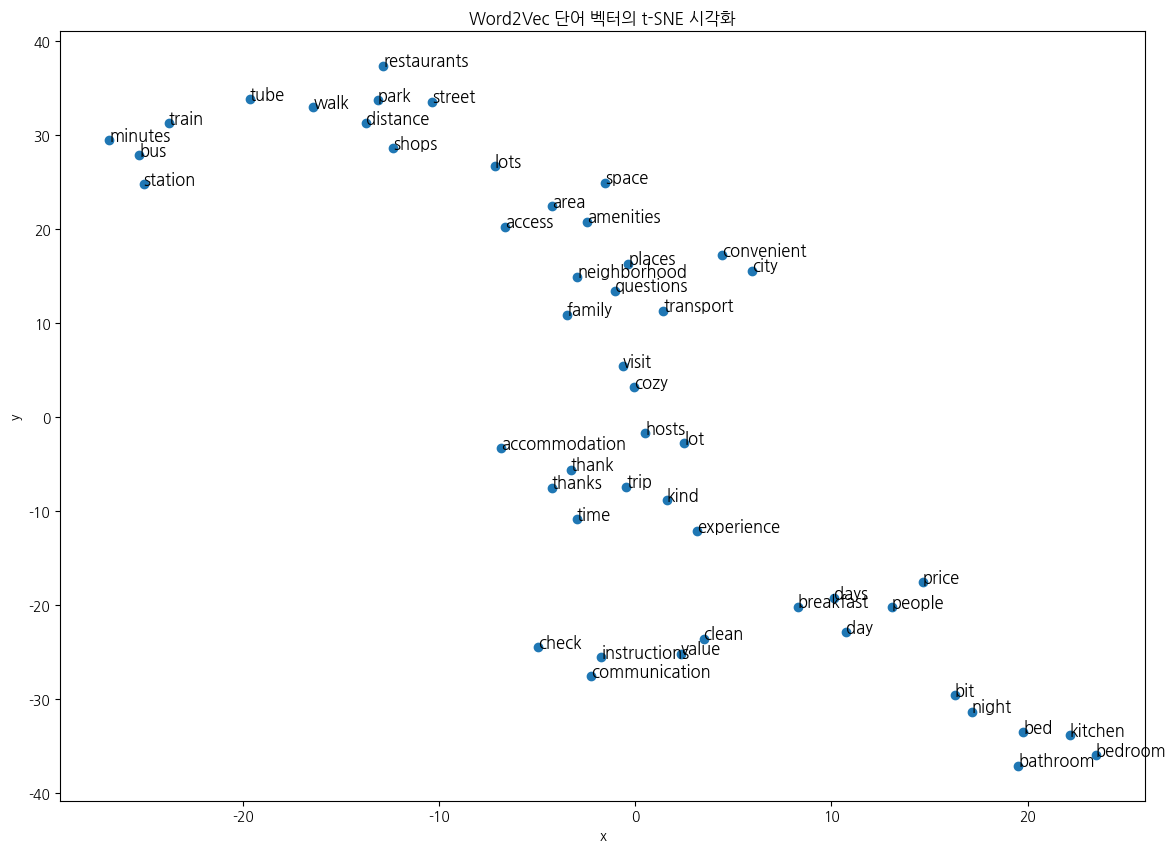

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Word2Vec 모델 학습
model = Word2Vec(sentences=filtered_texts, vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 추출 및 t-SNE 변환
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

tsne = TSNE(n_components=2, random_state=0, perplexity=5)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# t-SNE 결과를 DataFrame으로 변환
df = pd.DataFrame(word_vectors_tsne, index=words, columns=['x', 'y'])

# 시각화
plt.figure(figsize=(14, 10))
plt.scatter(df['x'], df['y'])

# 각 단어를 플롯에 표시
for word, pos in df.iterrows():
    plt.annotate(word, pos, fontsize=12)

plt.title('Word2Vec 단어 벡터의 t-SNE 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

word2vec

In [40]:
import pandas as pd

# 리뷰 데이터가 담긴 DataFrame (예: df)
# 예시로 df를 생성합니다. 실제 데이터 프레임을 사용하세요.
# df = pd.read_csv('path_to_your_file.csv')

# 10,000개의 랜덤 샘플 추출
review_5 = review_recent.sample(n=50000, random_state=42)


# 결과를 확인합니다.
# print(review_10)

In [ ]:
#요인분석 값 불러오기

factor_score = pd.read_csv('/content/drive/MyDrive/Weekly_project_TeamID/Data/Airbnb_London/factor_scores.csv', encoding='utf-8')

In [ ]:
factor_score

,Factor1,Factor2,Factor3
0,0.628718,0.866522,-0.432301
1,0.100038,-0.808698,-1.143165
2,0.340053,-0.785555,-0.605581
3,0.046740,-0.849759,-0.780382
4,0.323727,0.672199,-0.608328
...,...,...,...
36402,-3.004964,-0.542302,-0.961450
36403,0.710484,-0.682963,0.189336
36404,0.708756,-0.647723,0.995479
36405,0.721725,-0.688643,0.240732


In [41]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk



# 기본 NLTK 불용어와 추가 불용어 목록 통합
stop_words = set(stopwords.words('english'))
add_stopwords = ['great', 'good', 'nice', 'would', 'place', 'stay', 'apartment', 'house', 'room', 'host', 'comfortable',
                 'amazing', 'perfect', 'wonderful', 'excellent', 'lovely', 'highly', 'recommend', 'definitely', 'really',
                 'london', 'u', 'everything', 'well', 'home', 'helpful', 'also', 'like', 'location', 'staying', 'could',
                 'need', 'airbnb', 'host', 'room', 'u']

custom_stopwords = stop_words.union(add_stopwords)

lemma = WordNetLemmatizer()

# 전처리 함수
def preprocess(data):
    processed_words = []
    for review in data['리뷰']:
        review = re.sub(r"[^a-zA-Z]+", " ", review)  # 영문 대소문자 제외한 문자 공백으로 변경
        words = word_tokenize(review.lower())  # 소문자로 변환 후 토큰화
        words = [lemma.lemmatize(word) for word in words if word not in custom_stopwords]  # 불용어 제거 및 어간 추출
        words = [wored for word, pos in pos_tag(words) if pos in ['NN', 'NNS']]  # 명사만 추출
        if words:  # 빈 리스트가 아니면 추가
            processed_words.append(words)
    return processed_words



# 텍스트 데이터 전처리
processed_texts = preprocess(review_5)
# processed_texts_f = [preprocess(text) for text in texts_f]



In [42]:
# Word2Vec 모델 학습 (Skip-gram 방식) 특정단어들과 중심단어간의 거리 계산
word2vec_model = Word2Vec(sentences=processed_texts, vector_size=5, window=5, min_count=1, sg=1, workers=4)

In [44]:
review_5 = review_5.iloc[:46676]
review_df = review_5[['리뷰']]

In [ ]:
# # 단어 벡터 추출 함수
# def get_word_vector(word, model):
#     if word in model.wv:
#         return model.wv[word]
#     else:
#         return np.zeros(model.vector_size)

# # 코사인 유사도 계산 함수
# def calculate_cosine_similarity(vec1, vec2):
#     vec1 = vec1.reshape(1, -1)
#     vec2 = vec2.reshape(1, -1)
#     return cosine_similarity(vec1, vec2)[0][0]

# # 각 리스트 안의 단어들 간의 유사도 계산 및 출력
# for review in processed_texts:
#     print(f"리뷰: {' '.join(review)}")
#     word_list = review
#     similarity_matrix = pd.DataFrame(index=word_list, columns=word_list)

#     for word1 in word_list:
#         for word2 in word_list:
#             vec1 = get_word_vector(word1, word2vec_model)
#             vec2 = get_word_vector(word2, word2vec_model)
#             similarity = calculate_cosine_similarity(vec1, vec2)
#             similarity_matrix.at[word1, word2] = similarity

#     print(similarity_matrix)
#     print()

In [62]:
# 리뷰 벡터화 함수
def review_vector(model, review):
    word_vectors = [model.wv[word] for word in review if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# 모든 리뷰를 벡터화
review_vectors = np.array([review_vector(word2vec_model, review) for review in processed_texts])

# 리뷰들 간의 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(review_vectors)

# 유사도 행렬 크기와 리뷰 데이터 크기가 일치하는지 확인
# if cosine_sim_matrix.shape[0] == review_df.shape[0]:
    # 결과 출력
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=review_df.index, columns=review_df.index)
print(cosine_sim_df)
# else:
    # print("유사도 행렬의 크기와 리뷰 데이터의 크기가 일치하지 않습니다.")

          400819    651246    430892    322584    229212    136415    339605  \
400819  1.000000  0.976554  0.991256  0.984652  0.979911  0.958678  0.968748   
651246  0.976554  1.000000  0.951028  0.993035  0.974600  0.892534  0.905249   
430892  0.991256  0.951028  1.000000  0.972018  0.952294  0.976428  0.980113   
322584  0.984652  0.993035  0.972018  1.000000  0.968761  0.912598  0.919801   
229212  0.979911  0.974600  0.952294  0.968761  1.000000  0.895186  0.924617   
...          ...       ...       ...       ...       ...       ...       ...   
369605  0.966660  0.904623  0.977889  0.918226  0.932989  0.984240  0.997069   
486560  0.971998  0.918273  0.992956  0.943672  0.918794  0.987925  0.987836   
161778  0.931636  0.875416  0.961548  0.901063  0.891547  0.952277  0.964663   
15226   0.990912  0.986221  0.971431  0.988315  0.994641  0.913433  0.933608   
615431  0.951429  0.887270  0.968339  0.913079  0.875204  0.989163  0.972016   

          164036    550348    365248  .

In [63]:
cosine_sim_df = cosine_sim_df.iloc[:36407, 5:10]

In [64]:
cosine_sim_df

,136415,339605,164036,550348,365248
400819,0.958678,0.968748,0.966693,0.983288,0.909713
651246,0.892534,0.905249,0.896154,0.936443,0.904098
430892,0.976428,0.980113,0.979827,0.978697,0.926373
322584,0.912598,0.919801,0.922453,0.951771,0.918966
229212,0.895186,0.924617,0.907944,0.942164,0.826438
...,...,...,...,...,...
466717,0.957592,0.947744,0.927204,0.919407,0.985088
500638,0.916548,0.912150,0.908771,0.940989,0.904231
89249,0.932107,0.954129,0.904808,0.863170,0.763935
337891,0.852186,0.848367,0.827456,0.871342,0.892208


In [ ]:
# factor_list = factor_score.values
# factor_list = factor_list.tolist()
# factor_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [65]:
cosine_sim_df_list = cosine_sim_df.values.tolist()

In [66]:
cosine_sim_df_list

[[0.9586780071258545,
  0.9687480330467224,
  0.9666927456855774,
  0.9832884669303894,
  0.9097133278846741],
 [0.8925337195396423,
  0.9052489995956421,
  0.8961536288261414,
  0.9364425539970398,
  0.9040982723236084],
 [0.9764277338981628,
  0.9801130294799805,
  0.9798271059989929,
  0.9786974191665649,
  0.9263725876808167],
 [0.9125984907150269,
  0.9198006391525269,
  0.9224529266357422,
  0.9517713785171509,
  0.9189658761024475],
 [0.8951863646507263,
  0.9246168732643127,
  0.9079437851905823,
  0.9421635270118713,
  0.8264375925064087],
 [0.9999998807907104,
  0.9942171573638916,
  0.988287627696991,
  0.9693621397018433,
  0.9310309886932373],
 [0.9942171573638916,
  1.0000001192092896,
  0.981918454170227,
  0.9671941995620728,
  0.9048843383789062],
 [0.988287627696991,
  0.981918454170227,
  1.0000001192092896,
  0.989363968372345,
  0.9051517844200134],
 [0.9693621397018433,
  0.9671941995620728,
  0.989363968372345,
  0.9999999403953552,
  0.9022268056869507],
 [0.931

In [ ]:
!pip install factor-analyzer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=752ee342cc4951995be59d19c83d34153ca491d0963b3949050cb3b00c536fba
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [67]:
from factor_analyzer import  FactorAnalyzer
import matplotlib.pyplot as plt

import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(cosine_sim_df_list)  # 독립 변수
y = factor_score['Factor1']  # 종속 변수

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Factor1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1977
Date:                Tue, 11 Jun 2024   Prob (F-statistic):              0.963
Time:                        02:54:21   Log-Likelihood:                -50500.
No. Observations:               36407   AIC:                         1.010e+05
Df Residuals:                   36401   BIC:                         1.011e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0323      0.086      0.376      0.7

In [ ]:
# 단어 벡터 추출 함수
def get_word_vector(word, model):
    if word in model.wv:
        return model.wv[word]
    else:
        return np.zeros(model.vector_size)

#코사인 유사도 계산 함수
def calculate_cosine_similarity(vec1, vec2):
    vec1 = vec1.reshape(1,-1)
    vec2 = vec2.reshape(1,-1)
    return cosine_similarity(vec1, vec2)[0][0]

#단어 목록에서 유사성 계산 및 출력
word_list = list(word2vec_model.wv.index_to_key)
similarity_matrix = pd.DataFrame(index=word_list, columns=word_list)

for word1 in word_list:
    for word2 in word_list:
        vec1 = get_word_vector(word1, word2vec_model)
        vec2 = get_word_vector(word2, word2vec_model)
        similarity = calculate_cosine_similarity(vec1, vec2)
        similarity_matrix.at[word1, word2] = similarity






In [ ]:
# 필요한 NLTK 데이터 다운로드
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True